# DATA PREPARATION

In [ ]:
%pip install -r ../requirements.txt

### Download Kaggle dataset 

In [ ]:
import kagglehub
import shutil
import os

dataset_path = '../datasets/raw'
force_download = False

# Download latest version
path = kagglehub.dataset_download("soumendraprasad/musical-instruments-sound-dataset", force_download=force_download)
print("Kaggle downloaded files:", path)

# Cria a pasta de destino, se não existir
os.makedirs(dataset_path, exist_ok=True)

shutil.copytree(
    src=path,
    dst=dataset_path,
    dirs_exist_ok=True
)

print("Moved kaggle files to:", path)

### Organize files

In [1]:
import os
import re
import shutil
import pandas as pd
from pathlib import Path

RAW_DATASET_PATH = '../datasets/raw'
NORMALIZED_DATASET_PATH = '../datasets/normalized'
AUGMENTED_DATASET_PATH = '../datasets/augmented'
PREPARED_DATASET_PATH = '../datasets/prepared'
TRAINING_DATASET_PATH = '../datasets/training'

os.makedirs(NORMALIZED_DATASET_PATH, exist_ok=True)

# Função para normalizar nomes dos arquivos
def normalize_filename(filename: str) -> str:
    stem = Path(filename).stem
    stem = re.sub(r"[^a-zA-Z0-9]", "_", stem).lower()
    stem = re.sub(r"_+", "_", stem).strip("_")
    return f"{stem}.wav"

In [2]:
# Caminhos RAW
RAW_TRAIN_CSV_PATH = Path(os.path.join(RAW_DATASET_PATH, 'Metadata_Train.csv'))
print(f"RAW_TRAIN_CSV_PATH: {RAW_TRAIN_CSV_PATH}")

RAW_TRAIN_AUDIOS_DIR = Path(os.path.join(RAW_DATASET_PATH, 'Train_submission', 'Train_submission'))
print(f"RAW_TRAIN_AUDIOS_DIR: {RAW_TRAIN_AUDIOS_DIR}")

RAW_TEST_CSV_PATH = Path(os.path.join(RAW_DATASET_PATH, 'Metadata_Test.csv'))
print(f"RAW_TEST_CSV_PATH: {RAW_TEST_CSV_PATH}")

RAW_TEST_AUDIOS_DIR = Path(os.path.join(RAW_DATASET_PATH, 'Test_submission', 'Test_submission'))
print(f"RAW_TEST_AUDIOS_DIR: {RAW_TEST_AUDIOS_DIR}")

RAW_TRAIN_CSV_PATH: ../datasets/raw/Metadata_Train.csv
RAW_TRAIN_AUDIOS_DIR: ../datasets/raw/Train_submission/Train_submission
RAW_TEST_CSV_PATH: ../datasets/raw/Metadata_Test.csv
RAW_TEST_AUDIOS_DIR: ../datasets/raw/Test_submission/Test_submission


In [3]:
# Caminhos NORMALIZED
NORMALIZED_TRAIN_CSV_PATH = Path(os.path.join(NORMALIZED_DATASET_PATH, 'train_metadata.csv'))
print(f"NORMALIZED_TRAIN_CSV_PATH: {NORMALIZED_TRAIN_CSV_PATH}")

NORMALIZED_TRAIN_AUDIOS_DIR = Path(os.path.join(NORMALIZED_DATASET_PATH, 'train_data'))
print(f"NORMALIZED_TRAIN_AUDIOS_DIR: {NORMALIZED_TRAIN_AUDIOS_DIR}")

NORMALIZED_TEST_CSV_PATH = Path(os.path.join(NORMALIZED_DATASET_PATH, 'test_metadata.csv'))
print(f"NORMALIZED_TEST_CSV_PATH: {NORMALIZED_TEST_CSV_PATH}")

NORMALIZED_TEST_AUDIOS_DIR = Path(os.path.join(NORMALIZED_DATASET_PATH, 'test_data'))
print(f"NORMALIZED_TEST_AUDIOS_DIR: {NORMALIZED_TEST_AUDIOS_DIR}")


NORMALIZED_TRAIN_CSV_PATH: ../datasets/normalized/train_metadata.csv
NORMALIZED_TRAIN_AUDIOS_DIR: ../datasets/normalized/train_data
NORMALIZED_TEST_CSV_PATH: ../datasets/normalized/test_metadata.csv
NORMALIZED_TEST_AUDIOS_DIR: ../datasets/normalized/test_data


### Normalization

#### Normalize test files

In [ ]:
# Leitura do CSV
df = pd.read_csv(RAW_TEST_CSV_PATH)

# Correção e normalização da coluna de classe
df["Class"] = (
    df["Class"]
    .str.lower()
    .str.replace(r"^sound_", "", regex=True)
    .str.replace(r"(?i)^guiatr$", "guitar", regex=True)
)

# Guarda o nome original antes da normalização
df["OriginalFilename"] = df["FileName"]

# Normaliza o nome dos arquivos
df["FileName"] = df["FileName"].apply(normalize_filename)

df.head()

In [ ]:
os.makedirs(NORMALIZED_DATASET_PATH, exist_ok=True)
NORMALIZED_TEST_AUDIOS_DIR.mkdir(parents=True, exist_ok=True)

In [ ]:
missing_test_files = []

for _, row in df.iterrows():
    original_file = RAW_TEST_AUDIOS_DIR / row["OriginalFilename"]
    normalized_file = NORMALIZED_TEST_AUDIOS_DIR / row["FileName"]

    if original_file.exists():
        shutil.copy2(original_file, normalized_file)
    else:
        missing_test_files.append(str(original_file))

print(f"missing: {missing_test_files}")

In [ ]:
df = df.drop(columns=["OriginalFilename"])
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[^a-z0-9]+", "_", regex=True)
    .str.strip("_")
)

df.to_csv(NORMALIZED_TEST_CSV_PATH, index=False)

In [ ]:
print(f"✅ Arquivos normalizados e copiados para: {NORMALIZED_TEST_AUDIOS_DIR}")
print(f"📄 Novo CSV salvo em: {NORMALIZED_TEST_CSV_PATH}")

if missing_test_files:
    print(f"⚠️ Arquivos ausentes ({len(missing_test_files)}):")
    for f in missing_test_files[:5]:
        print(f" - {f}")
else:
    print("🎉 Todos os arquivos foram encontrados e copiados com sucesso!")

#### Normalize Train Files

In [ ]:
# Leitura do CSV
df_train = pd.read_csv(RAW_TRAIN_CSV_PATH)

# Correção e normalização da coluna de classe
df_train["Class"] = (
    df_train["Class"]
    .str.lower()
    .str.replace(r"^sound_", "", regex=True)
    .str.replace(r"(?i)^guiatr$", "guitar", regex=True)
)

# Guarda o nome original antes da normalização
df_train["OriginalFilename"] = df_train["FileName"]

# Normaliza o nome dos arquivos
df_train["FileName"] = df_train["FileName"].apply(normalize_filename)

df_train.head()


In [ ]:
os.makedirs(NORMALIZED_DATASET_PATH, exist_ok=True)
NORMALIZED_TRAIN_AUDIOS_DIR.mkdir(parents=True, exist_ok=True)

In [ ]:
missing_train_files = []

for _, row in df_train.iterrows():
    original_file = RAW_TRAIN_AUDIOS_DIR / row["OriginalFilename"]
    normalized_file = NORMALIZED_TRAIN_AUDIOS_DIR / row["FileName"]

    if original_file.exists():
        shutil.copy2(original_file, normalized_file)
    else:
        missing_train_files.append(str(original_file))

print(f"missing: {missing_train_files}")


In [ ]:
df_train = df_train.drop(columns=["OriginalFilename"])
df_train.columns = (
    df_train.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[^a-z0-9]+", "_", regex=True)
    .str.strip("_")
)

df_train.to_csv(NORMALIZED_TRAIN_CSV_PATH, index=False)


In [ ]:
print(f"✅ Arquivos normalizados e copiados para: {NORMALIZED_TRAIN_AUDIOS_DIR}")
print(f"📄 Novo CSV salvo em: {NORMALIZED_TRAIN_CSV_PATH}")

if missing_train_files:
    print(f"⚠️ Arquivos ausentes ({len(missing_train_files)}):")
    for f in missing_train_files[:5]:
        print(f" - {f}")
else:
    print("🎉 Todos os arquivos foram encontrados e copiados com sucesso!")

### Data Augmentation

In [4]:
import librosa
import soundfile as sf
import numpy as np
from tqdm import tqdm
import random

SAMPLE_RATE = 22050
MAX_AUGS_PER_ORIGINAL = 5

# Versão do dataset preparado
AUGMENTATION_VERSION = "v2"

# Diretórios base
AUGMENTED_DATASET_VERSION_PATH = Path(os.path.join(AUGMENTED_DATASET_PATH, AUGMENTATION_VERSION))
AUGMENTED_DATASET_VERSION_PATH.mkdir(parents=True, exist_ok=True)
print(f"📁 Versão {AUGMENTATION_VERSION}: {AUGMENTED_DATASET_VERSION_PATH}")

AUGMENTED_TRAIN_AUDIOS_DIR = Path(os.path.join(AUGMENTED_DATASET_VERSION_PATH, 'train_data'))
AUGMENTED_TRAIN_AUDIOS_DIR.mkdir(parents=True, exist_ok=True)
AUGMENTED_TRAIN_CSV_PATH = AUGMENTED_DATASET_VERSION_PATH / "train_metadata.csv"
print(f"📁 Cortes de treino serão salvos em: {AUGMENTED_TRAIN_AUDIOS_DIR}")
print(f"📁 Metadados de treino: {AUGMENTED_TRAIN_CSV_PATH}")

AUGMENTED_TEST_AUDIOS_DIR = Path(os.path.join(AUGMENTED_DATASET_VERSION_PATH, 'test_data'))
AUGMENTED_TEST_AUDIOS_DIR.mkdir(parents=True, exist_ok=True)
AUGMENTED_TEST_CSV_PATH = AUGMENTED_DATASET_VERSION_PATH / "test_metadata.csv"
print(f"📁 Cortes de treino serão salvos em: {AUGMENTED_TRAIN_AUDIOS_DIR}")
print(f"📁 Metadados de teste: {AUGMENTED_TRAIN_CSV_PATH}")


📁 Versão v2: ../datasets/augmented/v2
📁 Cortes de treino serão salvos em: ../datasets/augmented/v2/train_data
📁 Metadados de treino: ../datasets/augmented/v2/train_metadata.csv
📁 Cortes de treino serão salvos em: ../datasets/augmented/v2/train_data
📁 Metadados de teste: ../datasets/augmented/v2/train_metadata.csv


In [ ]:
AUGMENTATION_COMBINATIONS = {
    # 👇 Originais leves
    "original": [],
    "stretch_102": [("stretch", 1.02)],
    "pitch_up_0_5": [("pitch", 0.5)],
    "pitch_down_0_5": [("pitch", -0.5)],
    "noise_0_003": [("noise", 0.003)],
    "gain_0_95": [("gain", 0.95)],
    "gain_1_05": [("gain", 1.05)],

    "stretch_pitch_up": [("stretch", 1.02), ("pitch", 0.5)],
    "pitch_noise": [("pitch", -0.5), ("noise", 0.002)],
    "stretch_noise": [("stretch", 0.98), ("noise", 0.002)],
    "pitch_gain": [("pitch", 0.5), ("gain", 1.05)],
    "stretch_gain": [("stretch", 1.02), ("gain", 1.05)],

    # 👇 Novas variações mais fortes
    "stretch_095": [("stretch", 0.95)],
    "stretch_090": [("stretch", 0.90)],
    
    "pitch_up_1": [("pitch", 1.0)],
    "pitch_down_1": [("pitch", -1.0)],
    "pitch_down_1_noise": [("pitch", -1.0), ("noise", 0.005)],
    
    "noise_0_01": [("noise", 0.01)],
    
    "gain_0_8": [("gain", 0.8)],
    "gain_1_2": [("gain", 1.2)],

    "stretch_down_pitch_up": [("stretch", 0.95), ("pitch", 0.8)],
    "stretch_up_pitch_down": [("stretch", 1.05), ("pitch", -0.8)],
    
    "pitch_noise_gain": [("pitch", -0.8), ("noise", 0.005), ("gain", 1.1)],
}

def augment_audio(y, sr, steps):
    y_aug = np.copy(y)
    for aug_type, param in steps:
        if aug_type == "stretch":
            y_aug = librosa.effects.time_stretch(y_aug, rate=param)
        elif aug_type == "pitch":
            y_aug = librosa.effects.pitch_shift(y_aug, sr=sr, n_steps=param)
        elif aug_type == "noise":
            noise = np.random.normal(0, param, len(y_aug))
            y_aug += noise
        elif aug_type == "gain":
            y_aug *= param
    return y_aug

#### Augment test data

In [ ]:
df_test = pd.read_csv(NORMALIZED_TEST_CSV_PATH)
df_test.columns = df_test.columns.str.strip().str.lower().str.replace(r"[^a-z0-9]+", "_", regex=True)

augmented_test_records = []
grouped_test = df_test.groupby("class")

for class_name, group in tqdm(df_test.groupby("class"), desc="Test Augmentation"):
    combo_names = list(AUGMENTATION_COMBINATIONS.keys())
    combo_names.remove("original")

    for i, row in group.reset_index(drop=True).iterrows():
        original_path = NORMALIZED_TEST_AUDIOS_DIR / row["filename"]
        if not original_path.exists():
            continue

        y, sr = librosa.load(original_path, sr=SAMPLE_RATE)

        original_filename = f"{original_path.stem}__original.wav"
        output_original_path = AUGMENTED_TEST_AUDIOS_DIR / original_filename
        sf.write(output_original_path, y, sr, format="WAV")
        augmented_test_records.append({
            "filename": original_filename,
            "class": class_name,
            "augmentation": "original"
        })

        shuffled_combos = random.sample(combo_names, k=len(combo_names))
        for j in range(MAX_AUGS_PER_ORIGINAL):
            combo = shuffled_combos[j % len(shuffled_combos)]
            steps = AUGMENTATION_COMBINATIONS[combo]

            y_aug = augment_audio(y, sr, steps)
            filename_aug = f"{original_path.stem}__{combo}.wav"
            output_path = AUGMENTED_TEST_AUDIOS_DIR / filename_aug

            sf.write(output_path, y_aug, sr, format="WAV")
            augmented_test_records.append({
                "filename": filename_aug,
                "class": class_name,
                "augmentation": combo
            })


In [ ]:
df_augmented_test = pd.DataFrame(augmented_test_records)
df_augmented_test.to_csv(AUGMENTED_TEST_CSV_PATH, index=False)

print(f"📄 CSV de metadados de teste salvo em: {AUGMENTED_TEST_CSV_PATH}")
print(f"🎧 Total de arquivos augmentados no teste: {len(df_augmented_test)}")


#### Augment train data

In [ ]:

df_train = pd.read_csv(NORMALIZED_TRAIN_CSV_PATH)
grouped = df_train.groupby("class")

augmented_train_records = []


for class_name, group in tqdm(df_train.groupby("class"), desc="Train Augmentation"):
    combo_names = list(AUGMENTATION_COMBINATIONS.keys())
    combo_names.remove("original")

    for i, row in group.reset_index(drop=True).iterrows():
        original_path = NORMALIZED_TRAIN_AUDIOS_DIR / row["filename"]
        if not original_path.exists():
            continue

        y, sr = librosa.load(original_path, sr=SAMPLE_RATE)

        original_filename = f"{original_path.stem}__original.wav"
        output_original_path = AUGMENTED_TRAIN_AUDIOS_DIR / original_filename
        sf.write(output_original_path, y, sr, format="WAV")
        augmented_train_records.append({
            "filename": original_filename,
            "class": class_name,
            "augmentation": "original"
        })

        shuffled_combos = random.sample(combo_names, k=len(combo_names))
        for j in range(MAX_AUGS_PER_ORIGINAL):
            combo = shuffled_combos[j % len(shuffled_combos)]
            steps = AUGMENTATION_COMBINATIONS[combo]

            y_aug = augment_audio(y, sr, steps)
            filename_aug = f"{original_path.stem}__{combo}.wav"
            output_path = AUGMENTED_TRAIN_AUDIOS_DIR / filename_aug

            sf.write(output_path, y_aug, sr, format="WAV")
            augmented_train_records.append({
                "filename": filename_aug,
                "class": class_name,
                "augmentation": combo
            })

In [ ]:
df_augmented_train = pd.DataFrame(augmented_train_records)
df_augmented_train.to_csv(AUGMENTED_TRAIN_CSV_PATH, index=False)

print(f"📄 CSV de metadados salvo em: {AUGMENTED_TRAIN_CSV_PATH}")
print(f"🎧 Total de arquivos augmentados: {len(df_augmented_train)}")

### Preparation

In [5]:
import librosa
import soundfile as sf
import numpy as np
from tqdm import tqdm

WINDOW_SIZE = 3.0    # segundos
OVERLAP = 1.5        # segundos
SAMPLE_RATE = 22050

PREPARATION_VERSION = "v2"
AUGMENTATION_VERSION_SOURCE = "v2"

# Diretórios base
PREPARED_DATASET_VERSION_PATH = Path(os.path.join(PREPARED_DATASET_PATH, PREPARATION_VERSION))
PREPARED_DATASET_VERSION_PATH.mkdir(parents=True, exist_ok=True)
print(f"📁 Versão {PREPARATION_VERSION}: {PREPARED_DATASET_VERSION_PATH}")

PREPARED_TRAIN_AUDIOS_DIR = Path(os.path.join(PREPARED_DATASET_VERSION_PATH, 'train_data'))
PREPARED_TRAIN_AUDIOS_DIR.mkdir(parents=True, exist_ok=True)
print(f"📁 Cortes de treino serão salvos em: {PREPARED_TRAIN_AUDIOS_DIR}")

PREPARED_TEST_AUDIOS_DIR = Path(os.path.join(PREPARED_DATASET_VERSION_PATH, 'test_data'))
PREPARED_TEST_AUDIOS_DIR.mkdir(parents=True, exist_ok=True)
print(f"📁 Cortes de teste serão salvos em: {PREPARED_TEST_AUDIOS_DIR}")

AUGMENTED_PREPARE_DATASET_VERSION_PATH = Path(os.path.join(AUGMENTED_DATASET_PATH, AUGMENTATION_VERSION_SOURCE))

print(f"📁 Fonte dataset augmented: {AUGMENTED_PREPARE_DATASET_VERSION_PATH}")

AUGMENTED_PREPARE_TEST_AUDIOS_DIR = Path(os.path.join(AUGMENTED_PREPARE_DATASET_VERSION_PATH, 'test_data'))
AUGMENTED_PREPARE_TEST_CSV_PATH = AUGMENTED_PREPARE_DATASET_VERSION_PATH / "test_metadata.csv"
print(f" - AUGMENTED_PREPARE_TEST_CSV_PATH: {AUGMENTED_PREPARE_TEST_CSV_PATH}")
print(f" - AUGMENTED_PREPARE_TEST_AUDIOS_DIR: {AUGMENTED_PREPARE_TEST_AUDIOS_DIR}")

AUGMENTED_PREPARE_TRAIN_AUDIOS_DIR = Path(os.path.join(AUGMENTED_PREPARE_DATASET_VERSION_PATH, 'train_data'))
AUGMENTED_PREPARE_TRAIN_CSV_PATH = AUGMENTED_PREPARE_DATASET_VERSION_PATH / "train_metadata.csv"
print(f" - AUGMENTED_PREPARE_TRAIN_AUDIOS_DIR: {AUGMENTED_PREPARE_TRAIN_AUDIOS_DIR}")
print(f" - AUGMENTED_PREPARE_TRAIN_CSV_PATH: {AUGMENTED_PREPARE_TRAIN_CSV_PATH}")


📁 Versão v2: ../datasets/prepared/v2
📁 Cortes de treino serão salvos em: ../datasets/prepared/v2/train_data
📁 Cortes de teste serão salvos em: ../datasets/prepared/v2/test_data
📁 Fonte dataset augmented: ../datasets/augmented/v2
 - AUGMENTED_PREPARE_TEST_CSV_PATH: ../datasets/augmented/v2/test_metadata.csv
 - AUGMENTED_PREPARE_TEST_AUDIOS_DIR: ../datasets/augmented/v2/test_data
 - AUGMENTED_PREPARE_TRAIN_AUDIOS_DIR: ../datasets/augmented/v2/train_data
 - AUGMENTED_PREPARE_TRAIN_CSV_PATH: ../datasets/augmented/v2/train_metadata.csv


In [ ]:
def slice_audio_with_overlap(file_path: Path, class_name: str, output_dir: Path, 
                             window_size: float, overlap: float, sample_rate: int = SAMPLE_RATE):
    try:
        y, sr = librosa.load(file_path, sr=sample_rate)
    except Exception as e:
        print(f"❌ Erro ao carregar {file_path.name}: {e}")
        return []

    window_samples = int(window_size * sr)
    hop_samples = int((window_size - overlap) * sr)

    segments = []
    base_name = file_path.stem  # Nome base sem extensão

    for i, start in enumerate(range(0, len(y), hop_samples)):
        end = start + window_samples
        slice_audio = y[start:end]

        # Padding com zeros se for menor que o necessário
        if len(slice_audio) < window_samples:
            slice_audio = np.pad(slice_audio, (0, window_samples - len(slice_audio)))

        # Gera nome padronizado com extensão .wav
        filename_seq = f"{base_name}_{i+1:06}.wav"
        out_path = output_dir / filename_seq

        try:
            sf.write(out_path, slice_audio, sr, format='WAV')
            segments.append((filename_seq, class_name))
        except Exception as e:
            print(f"❌ Erro ao salvar {out_path.name}: {e}")

        if end >= len(y):
            break

    return segments


#### Prepare test files

In [ ]:
df_test = pd.read_csv(AUGMENTED_PREPARE_TEST_CSV_PATH)

prepared_test_data = []

for _, row in tqdm(df_test.iterrows(), total=len(df_test)):
    original_path = AUGMENTED_PREPARE_TEST_AUDIOS_DIR / row["filename"]
    class_name = row["class"]

    if original_path.exists():
        segments = slice_audio_with_overlap(
            file_path=original_path,
            class_name=class_name,
            output_dir=PREPARED_TEST_AUDIOS_DIR,
            window_size=WINDOW_SIZE,
            overlap=OVERLAP,
            sample_rate=SAMPLE_RATE
        )
        prepared_test_data.extend(segments)


In [ ]:
df_prepared_test = pd.DataFrame(prepared_test_data, columns=["filename", "class"])

PREPARED_TEST_CSV_PATH = PREPARED_DATASET_VERSION_PATH / "test_metadata.csv"
df_prepared_test.to_csv(PREPARED_TEST_CSV_PATH, index=False)

print(f"📄 Metadata de teste salva em: {PREPARED_TEST_CSV_PATH}")
print(f"🎧 Total de segmentos: {len(df_prepared_test)}")


#### Prepare train files

In [ ]:
df_train = pd.read_csv(AUGMENTED_PREPARE_TRAIN_CSV_PATH)

prepared_train_data = []

for _, row in tqdm(df_train.iterrows(), total=len(df_train)):
    original_path = AUGMENTED_PREPARE_TRAIN_AUDIOS_DIR / row["filename"]
    class_name = row["class"]

    if original_path.exists():
        segments = slice_audio_with_overlap(
            file_path=original_path,
            class_name=class_name,
            output_dir=PREPARED_TRAIN_AUDIOS_DIR,
            window_size=WINDOW_SIZE,
            overlap=OVERLAP,
            sample_rate=SAMPLE_RATE
        )
        prepared_train_data.extend(segments)


In [ ]:
df_prepared_train = pd.DataFrame(prepared_train_data, columns=["filename", "class"])

PREPARED_TRAIN_CSV_PATH = PREPARED_DATASET_VERSION_PATH / "train_metadata.csv"
df_prepared_train.to_csv(PREPARED_TRAIN_CSV_PATH, index=False)

print(f"📄 Metadata de treino salva em: {PREPARED_TRAIN_CSV_PATH}")
print(f"🎧 Total de segmentos: {len(df_prepared_train)}")


#### Verify Files

In [ ]:
import librosa
from collections import Counter
from tqdm import tqdm

CHECK_TEST_DIR = PREPARED_DATASET_VERSION_PATH / "test_data"
SAMPLE_RATE = 22050

sample_test_lengths = []

for path in tqdm(sorted(CHECK_TEST_DIR.glob("*.wav"))):
    try:
        y, sr = librosa.load(path, sr=SAMPLE_RATE)
        sample_test_lengths.append(len(y))
    except Exception as e:
        print(f"Erro ao carregar {path.name}: {e}")

length_test_counts = Counter(sample_test_lengths)

print("📊 Distribuição dos tamanhos encontrados (em número de samples):")
for length, count in length_test_counts.items():
    duration = length / SAMPLE_RATE
    print(f"- {length} samples (~{duration:.2f}s): {count} arquivos")

if len(length_test_counts) == 1:
    print("✅ Todos os arquivos têm o mesmo tamanho!")
else:
    print("⚠️ Existem arquivos com tamanhos diferentes!")

In [ ]:
import librosa
from collections import Counter
from tqdm import tqdm

CHECK_TRAIN_DIR = PREPARED_DATASET_VERSION_PATH / "train_data"
SAMPLE_RATE = 22050

sample_train_lengths = []

for path in tqdm(sorted(CHECK_TRAIN_DIR.glob("*.wav"))):
    try:
        y, sr = librosa.load(path, sr=SAMPLE_RATE)
        sample_train_lengths.append(len(y))
    except Exception as e:
        print(f"Erro ao carregar {path.name}: {e}")

length_train_counts = Counter(sample_train_lengths)

print("📊 Distribuição dos tamanhos encontrados (em número de samples):")
for length, count in length_train_counts.items():
    duration = length / SAMPLE_RATE
    print(f"- {length} samples (~{duration:.2f}s): {count} arquivos")

if len(length_train_counts) == 1:
    print("✅ Todos os arquivos têm o mesmo tamanho!")
else:
    print("⚠️ Existem arquivos com tamanhos diferentes!")

### Convert Audios to spectogram to TRAIN dataset

In [6]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

TRAINING_VERSION = "v2"
PREPARED_VERSION_SOURCE = "v2"

# Diretórios base
TRAINING_DATASET_VERSION_PATH = Path(os.path.join(TRAINING_DATASET_PATH, TRAINING_VERSION))
TRAINING_DATASET_VERSION_PATH.mkdir(parents=True, exist_ok=True)
print(f"📁 Versão {TRAINING_VERSION}: {TRAINING_DATASET_VERSION_PATH}")

TRAINING_TRAIN_AUDIOS_DIR = Path(os.path.join(TRAINING_DATASET_VERSION_PATH, 'train_data'))
TRAINING_TRAIN_AUDIOS_DIR.mkdir(parents=True, exist_ok=True)
print(f"📁 Espectogramas de treino serão salvos em: {TRAINING_TRAIN_AUDIOS_DIR}")

TRAINING_TEST_AUDIOS_DIR = Path(os.path.join(TRAINING_DATASET_VERSION_PATH, 'test_data'))
TRAINING_TEST_AUDIOS_DIR.mkdir(parents=True, exist_ok=True)
print(f"📁 Espectogramas de teste serão salvos em: {TRAINING_TEST_AUDIOS_DIR}")

PREPARED_TRAINING_DATASET_VERSION_PATH = Path(os.path.join(PREPARED_DATASET_PATH, PREPARED_VERSION_SOURCE))

print(f"📁 Fonte dataset augmented: {PREPARED_TRAINING_DATASET_VERSION_PATH}")

PREPARED_TRAINING_TEST_AUDIOS_DIR = Path(os.path.join(PREPARED_TRAINING_DATASET_VERSION_PATH, 'test_data'))
PREPARED_TRAINING_TEST_CSV_PATH = PREPARED_TRAINING_DATASET_VERSION_PATH / "test_metadata.csv"
print(f" - PREPARED_TRAINING_TEST_CSV_PATH: {PREPARED_TRAINING_TEST_CSV_PATH}")
print(f" - PREPARED_TRAINING_TEST_AUDIOS_DIR: {PREPARED_TRAINING_TEST_AUDIOS_DIR}")


PREPARED_TRAINING_TRAIN_AUDIOS_DIR = Path(os.path.join(PREPARED_TRAINING_DATASET_VERSION_PATH, 'train_data'))
PREPARED_TRAINING_TRAIN_CSV_PATH = PREPARED_TRAINING_DATASET_VERSION_PATH / "train_metadata.csv"
print(f" - PREPARED_TRAINING_TEST_CSV_PATH: {PREPARED_TRAINING_TEST_CSV_PATH}")
print(f" - PREPARED_TRAINING_TEST_AUDIOS_DIR: {PREPARED_TRAINING_TEST_AUDIOS_DIR}")


📁 Versão v2: ../datasets/training/v2
📁 Espectogramas de treino serão salvos em: ../datasets/training/v2/train_data
📁 Espectogramas de teste serão salvos em: ../datasets/training/v2/test_data
📁 Fonte dataset augmented: ../datasets/prepared/v2
 - PREPARED_TRAINING_TEST_CSV_PATH: ../datasets/prepared/v2/test_metadata.csv
 - PREPARED_TRAINING_TEST_AUDIOS_DIR: ../datasets/prepared/v2/test_data
 - PREPARED_TRAINING_TEST_CSV_PATH: ../datasets/prepared/v2/test_metadata.csv
 - PREPARED_TRAINING_TEST_AUDIOS_DIR: ../datasets/prepared/v2/test_data


📁 Arquivo: rock_7_100bpm__pitch_down_1_000039.wav
🔢 Sample rate: 22050
🔈 Tamanho do áudio (amostras): 66150
⏱️ Duração (s): 3.00
🖼️ Shape MEL (mel_bins x frames): (128, 130)


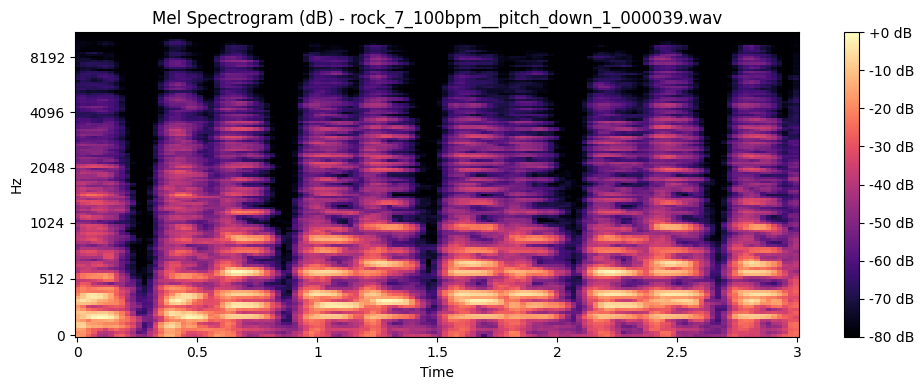

📁 Arquivo: percussion_spirit_drums_by_prettysleepy_art_13788__stretch_090_000028.wav
🔢 Sample rate: 22050
🔈 Tamanho do áudio (amostras): 66150
⏱️ Duração (s): 3.00
🖼️ Shape MEL (mel_bins x frames): (128, 130)


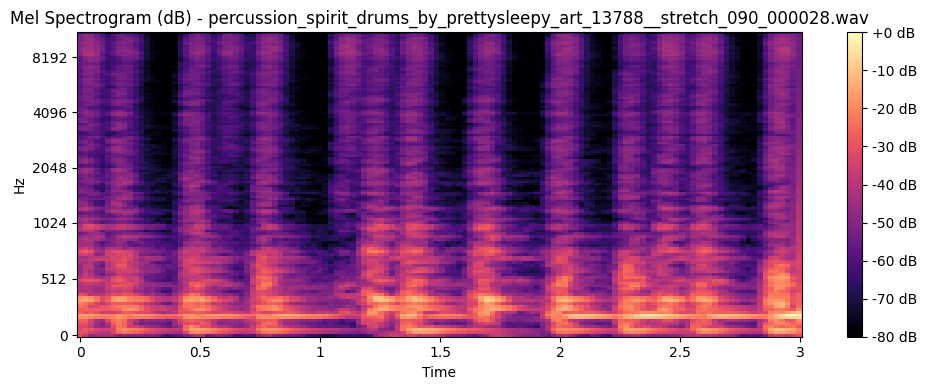

📁 Arquivo: 100bpm_808_like_drum_loop_74838__stretch_down_pitch_up_000002.wav
🔢 Sample rate: 22050
🔈 Tamanho do áudio (amostras): 66150
⏱️ Duração (s): 3.00
🖼️ Shape MEL (mel_bins x frames): (128, 130)


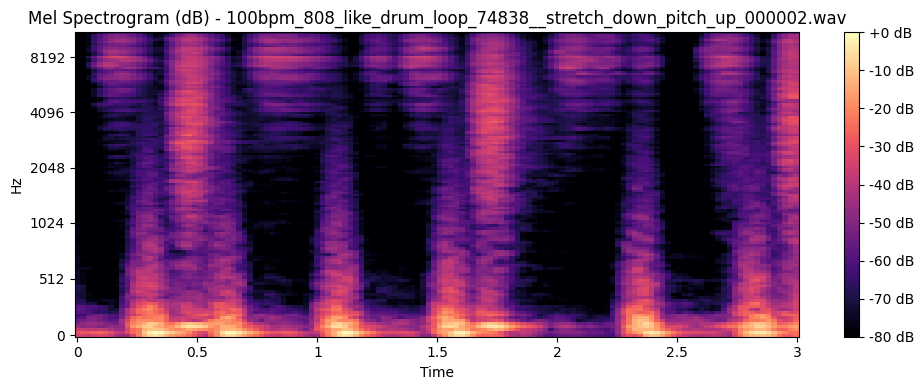

📁 Arquivo: 100bpm_808_like_drum_loop_74838__original_000002.wav
🔢 Sample rate: 22050
🔈 Tamanho do áudio (amostras): 66150
⏱️ Duração (s): 3.00
🖼️ Shape MEL (mel_bins x frames): (128, 130)


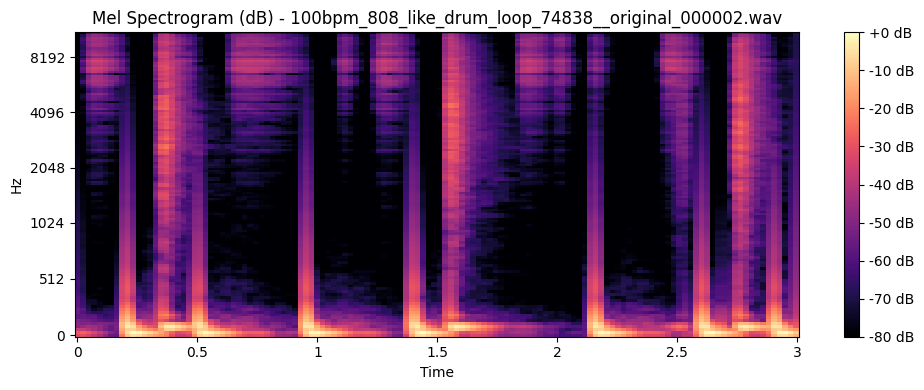

📁 Arquivo: room_room8_mus_beethoven2__gain_0_95_000004.wav
🔢 Sample rate: 22050
🔈 Tamanho do áudio (amostras): 66150
⏱️ Duração (s): 3.00
🖼️ Shape MEL (mel_bins x frames): (128, 130)


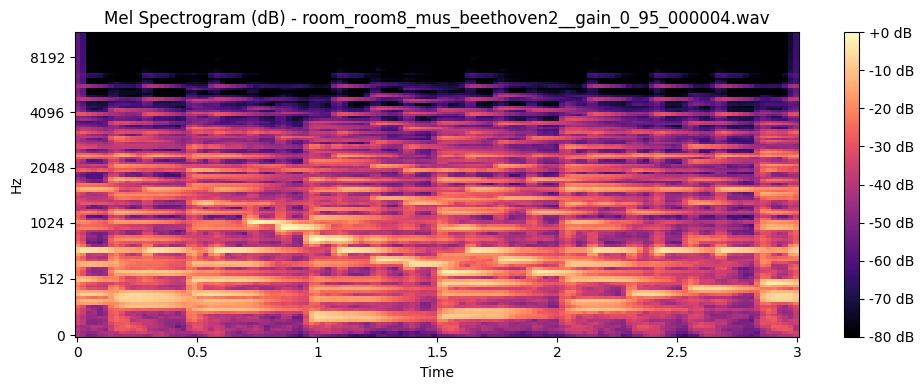

In [9]:
idx = [4355,1000,50,1 , 5000]

# 🎚️ Parâmetros do Mel Spectrogram
SAMPLE_RATE = 22050
N_MELS = 128
HOP_LENGTH = 512
N_FFT = 2048

df_test_prepared = pd.read_csv(PREPARED_TRAINING_TEST_CSV_PATH)

for i in idx:
    file_row = df_test_prepared.iloc[i]
    filename = file_row["filename"]
    file_path = PREPARED_TRAINING_TEST_AUDIOS_DIR / filename

    # 🎧 Carrega o áudio
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

    print(f"📁 Arquivo: {filename}")
    print(f"🔢 Sample rate: {sr}")
    print(f"🔈 Tamanho do áudio (amostras): {len(y)}")
    print(f"⏱️ Duração (s): {len(y) / sr:.2f}")

    # 🎼 Mel Spectrogram → dB
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mels=N_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    print(f"🖼️ Shape MEL (mel_bins x frames): {mel_spec_db.shape}")

    # 📊 Plota o espectrograma
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram (dB) - {filename}')
    plt.tight_layout()
    plt.show()


In [ ]:
MEL_PARAMS = {
    "sample_rate": 22050,
    "n_fft": 2048,
    "hop_length": 512,
    "n_mels": 128,
    "compress": False  # 👈 Defina True para usar np.savez_compressed
}

print("🎚️ Parâmetros do Mel Spectrogram:")
for k, v in MEL_PARAMS.items():
    print(f" - {k}: {v}")


In [ ]:
def generate_mel_dataset(audio_dir: Path, metadata_csv: Path, output_dir: Path, mel_params: dict):
    df = pd.read_csv(metadata_csv)
    output_dir.mkdir(parents=True, exist_ok=True)

    records = []

    for _, row in tqdm(df.iterrows(), total=len(df), desc=f"Gerando espectrogramas em {output_dir.name} compressed: {mel_params.get('compress', False)}"):
        filename = row["filename"]
        class_name = row["class"]

        path = audio_dir / filename
        try:
            y, sr = librosa.load(path, sr=mel_params["sample_rate"])
            mel = librosa.feature.melspectrogram(
                y=y,
                sr=sr,
                n_fft=mel_params["n_fft"],
                hop_length=mel_params["hop_length"],
                n_mels=mel_params["n_mels"]
            )
            mel_db = librosa.power_to_db(mel, ref=np.max)

            out_name = filename.replace(".wav", ".npz")
            out_path = output_dir / out_name

            if mel_params.get("compress", False):
                np.savez_compressed(out_path, mel=mel_db)
            else:
                np.savez(out_path, mel=mel_db)

            records.append({
                "filename": out_name,
                "class": class_name,
            })

        except Exception as e:
            print(f"❌ Erro no arquivo {filename}: {e}")

    return pd.DataFrame(records)


#### Generate test data

In [ ]:
df_mel_test = generate_mel_dataset(
    PREPARED_TRAINING_TEST_AUDIOS_DIR,
    PREPARED_TRAINING_TEST_CSV_PATH,
    TRAINING_TEST_AUDIOS_DIR,
    MEL_PARAMS
)

df_mel_test.to_csv(TRAINING_DATASET_VERSION_PATH / "test_metadata.csv", index=False)

#### Generate train data

In [ ]:
df_mel_train = generate_mel_dataset(
    PREPARED_TRAINING_TRAIN_AUDIOS_DIR,
    PREPARED_TRAINING_TRAIN_CSV_PATH,
    TRAINING_TRAIN_AUDIOS_DIR,
    MEL_PARAMS
)

df_mel_train.to_csv(TRAINING_DATASET_VERSION_PATH / "train_metadata.csv", index=False)